**피드포워드 신경망**

입력 데이터의 흐름이 앞으로만 전달되는 신경망
- fully connected layer, CNN
- 순차 데이터에 적합하지 X

# 09-1. 순차 데이터와 순환 신경망

**순차 데이터**

텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터

ex) I am a boy(o) boy am  a I (x)

ex) 일별 온도 기록


- 순차 데이터를 다룰 때, 이전에 입력한 데이터를 기억하는 것이 중요




**순환 신경망(RNN)**

이전 데이터가 신경망 층에 순환되는 신경망
- 일반적인 fully connected layer에 이전 데이터 처리 흐름을 순환하는 고리만 추가

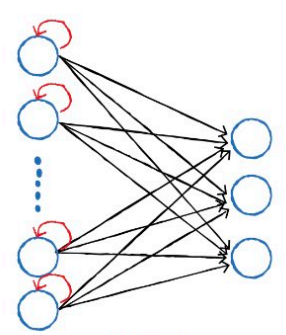

A 출력 -> 출력 결과가 다시 뉴런으로 들어감 -> A출력 결과와 B를 사용하여 출력(A에 대한 정보 포함) -> B출력 결과와 C를 사용하여 출력(A, B에 대한 정보 포함)


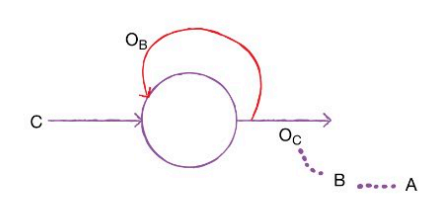

**타임 스텝**

순환 신경망에서 샘플 처리하는 한 단계

**셀**

순환 신경망의 층
- 여러 개의 뉴런 존재
- 셀의 출력을 은닉 상태라고 부름

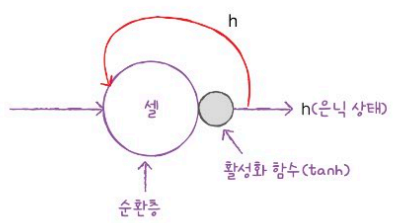

- 활성화 함수로 hyperbolic tangent 함수 주로 사용(범위 -1~1)
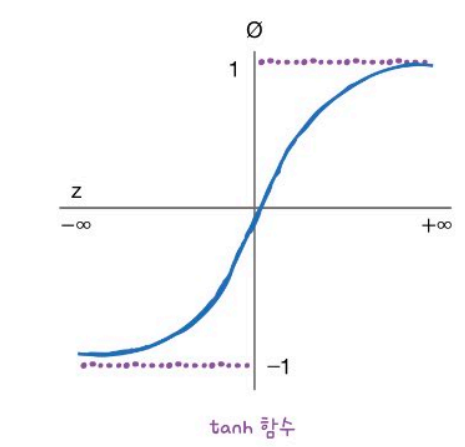

**순환 신경망의 가중치**
1. 이전 타임스텝의 은닉 상태(출력)에 곱해지는 가중치(이전 가중치X) (Wh)

2. 현재 입력에 곱해지는 가중치(Wx)

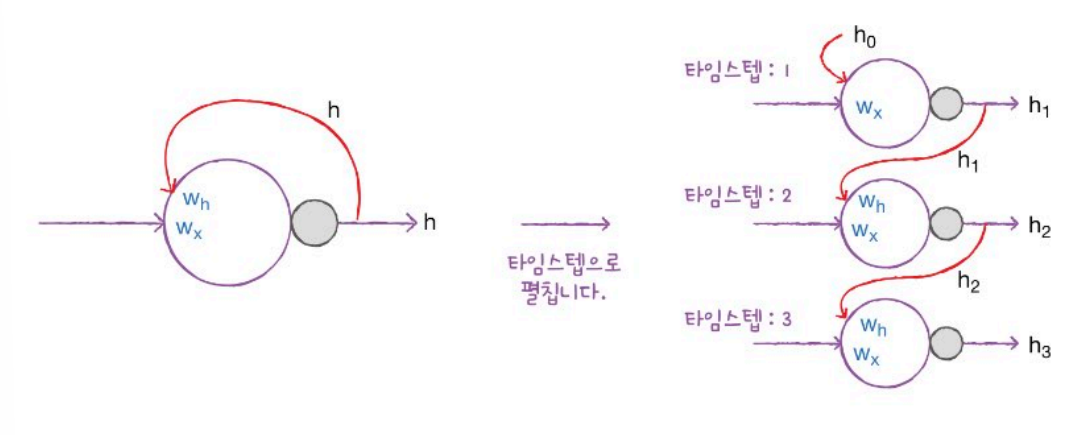

- Wh는 타임스텝에 따라 변화되는 뉴런의 출력 학습
- 맨 처음 샘플의 Wh는 0으로 초기화


**가중치 크기**

(특성 4개, 순환층의 뉴런 3개 가정)
- Wx : 4 X 3 = 12 (완전 연결)

- Wh : 3 X 3 = 9 (이전 타임스템의 은닉 상태가 다음 타임스텝의 뉴런에 완전연결)

한 뉴런의 은닉상태가 자신 뿐만 아니라 다른 뉴런들에도 모두 전달

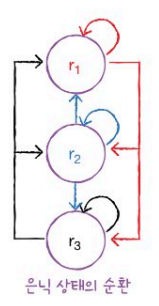

- 모델 파라미터 수 : 12 + 9 + 3(절편) = 24


**입력 크기**

입력: 3차원(샘플 개수, 시퀀스(타임스텝)길이, 단어표현)

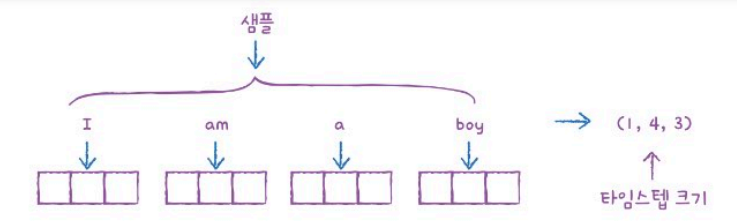
- 샘플마다 2차원의 크기
- 입력층이 순환층을 통과하면 (샘플, 마지막 순환층의 뉴런 개수) 만큼 출력
*마지막 순환층의 경우 마지막 타임스텝의 은닉 상태만 출력하기 때문

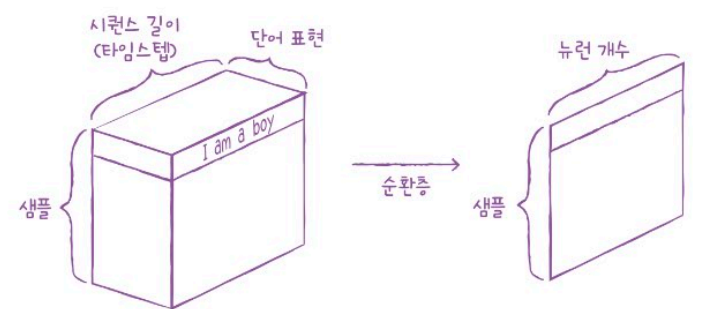


**순환층의 출력**

- 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉상태 출력
- 마지막 셀만 마지막 타임스템의 은닉 상태만 출력(정보 기억)

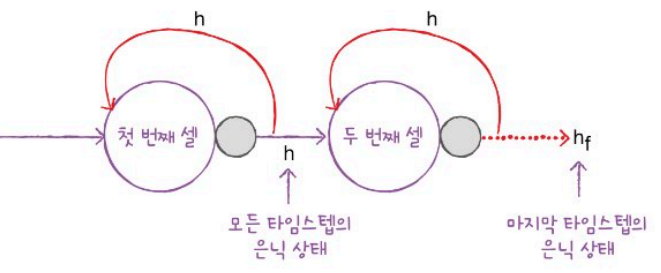

**출력층 구성**

- CNN과 마찬가지로 마지막에 클래스 개수만큼의 뉴런을 가진 밀집층을 두고 소프트맥스적용 (다중)/ 하나의 뉴런을 두고 시그모이드 적용 (이진)
- 마지막 셀의 출력이 1차원이기 때문에 셀의 출력 그대로 밀집층에 사용


확인문제.

순환신경망에서 한 셀에 있는 뉴런의 수가 10개일 때, 이 셀의 은닉상태가 다음스텝에 사용될 때 곱해지는 가중치 Wh의 크기?

-> 들어오는 h개수 = 뉴런 수, 각 뉴런에서 계산하므로 (뉴런 수 X 뉴런 수) = (10,10)

#09-2 순환 신경망으로 IMDB리뷰 분류하기

**데이터 전달**

- 컴퓨터는 숫자 데이터만을 처리하므로 텍스트를 숫자로 변환

1. 문장을 단어로 분리(토큰화)
2. 각 단어를 하나의 정수로 매핑(동일한 단어면 동일한 정수)

In [ ]:
#정수로 변환된 IMDB데이터 로드
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) #가장 자주 등장하는 단어 500개는 어휘사전 값 사용

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


텍스트 마다 길이가 달라 2차원 배열에 담을 경우 빈 공간 형성 -> 각 리뷰를 리스트 객체로 만들어 1차원 넘파이 배열 형성

In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(len(train_input[1]))

189


In [ ]:
#첫 번째 리뷰(샘플)에 담긴 내용 출력 (어휘사전에 없는 값 ->2 )
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
#앞 20개 샘플의 타깃값 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


0-> 부정, 1-> 긍정

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

**샘플 길이 맞추기**

In [ ]:
#훈련 데이터의 길이 분석
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
#평균, 중간값
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


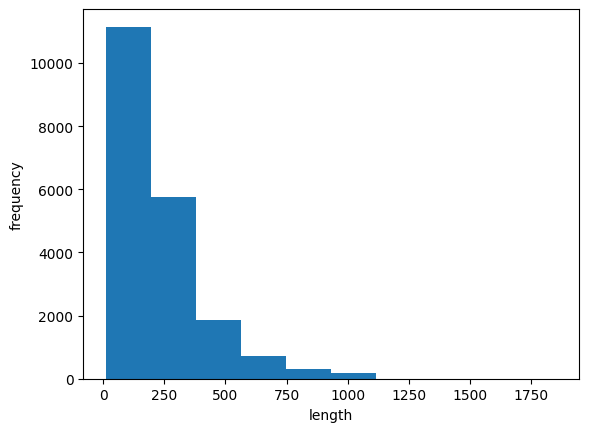

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

대부분 단어개수가 100을 넘지 않으므로 리뷰 길이 100으로 통일(타임스텝 개수 100)
- 100이상 -> 자르기
- 100 미만 -> 0으로 패딩

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen= 100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


첫 번째 샘플을 보았을 때, 앞부분이 잘림

In [ ]:
#여섯번째 샘플 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


패딩 또한 앞부분에 적용
- 시퀀스의 마지막 단어가 셀의 은닉 상태에 가장 크게 작용하기 때문

In [ ]:
#검증 세트의 길이도 100으로 변경
val_seq = pad_sequences(val_input, maxlen = 100)

**원-핫 인코딩**

- 입력에서 큰 정수가 큰 활성화 출력을 만드는데, 크기에 의미가 없는 정수들을 주입하면 문제 발생
- 크기 속성을 없애면서 각 정수를 고유하게 표현하는 방식 이용 (1차원->2차원)
- x -> x+1번째 원소만 1이고 나머지 0인 배열 생성
- 총 500개의 단어를 0~499로 지정했기 때문에 배열의 크기는 500

**순환 신경망 만들기**

- keras의 simpleRNN 클래스
- 이진분류문제 -> 시그모이드
- RNN, CNN 모두 적용되는 Sequential클래스 사용
    - default 활성화 함수 : tanh

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500))) #한 샘플당 단어개수 100개, 단어 당 배열크기 500
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
#원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
#첫 번째 샘플의 첫 토큰 (10)
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
#검증 셋 원-핫 인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
#모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


4072 = 500(배열 크기) X 8(뉴런 수) + 8(은닉상태 크기) X 8(뉴런 수) + 8(가중치)

**순환 신경망 훈련하기**

- RMSprop 학습률 0.0001로 지정
- epoch 100
- batch size 64
- 체크포인트, 조기종료

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate =1e-4)
#컴파일
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_simplernn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 37ms/step - loss: 0.7015 - accuracy: 0.5025 - val_loss: 0.6989 - val_accuracy: 0.4994
Epoch 2/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6954 - accuracy: 0.5138 - val_loss: 0.6945 - val_accuracy: 0.5080
Epoch 3/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6910 - accuracy: 0.5270 - val_loss: 0.6910 - val_accuracy: 0.5244
Epoch 4/100
313/313 [==============================] - 17s 56ms/step - loss: 0.6871 - accuracy: 0.5436 - val_loss: 0.6880 - val_accuracy: 0.5368
Epoch 5/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6829 - accuracy: 0.5634 - val_loss: 0.6841 - val_accuracy: 0.5542
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6772 - accuracy: 0.5817 - val_loss: 0.6762 - val_accuracy: 0.5822
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6584 - accuracy: 0.6216 - val_loss: 0.6389 - val_ac

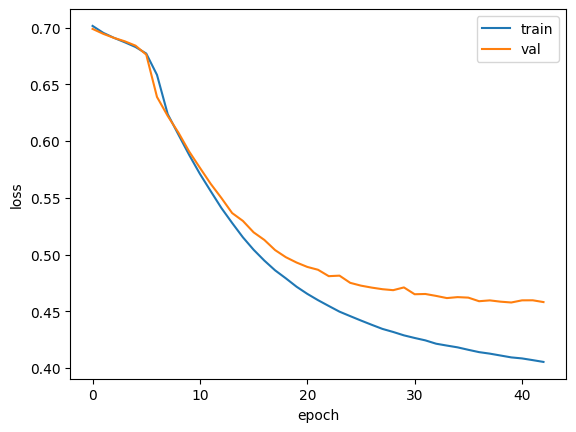

In [ ]:
#손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

40epoch 에서 최적의 가중치 학습, 43epoch에서 earlystopping

원-핫 인코딩은 입력 데이터가 매우 커지는 단점 존재
-> 단어 임베딩 사용



**단어 임베딩**

각 단어를 고정된 크기의 실수벡터로 변환
- 어휘 사전의 정수값을 실수배열로 변환
- 초기에 랜덤 초기화, 훈련을 통해 학습
- 입력으로 train_oh가 아닌 train_seq를 받아 메모리 효율적으로 사용
- 임베딩 결과의 벡터 또한 원-핫 인코딩보다 매우 작은 크기
- keras의 Embedding클래스
    - 매개변수 : (단어사전 크기, 임베딩 벡터 크기, 시퀀스 길이)


In [ ]:
#단어 임베딩을 사용한 두 번째 모델
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


8000 = 500(총 토큰 수 ) X 16

200 = 16 X 8 + 8 X 8 + 8

In [ ]:
from tensorflow import keras
rmsprop = keras.optimizers.RMSprop(learning_rate =1e-4)
#컴파일
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_embedding-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 31ms/step - loss: 0.6940 - accuracy: 0.5139 - val_loss: 0.6940 - val_accuracy: 0.5104
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6888 - accuracy: 0.5348 - val_loss: 0.6915 - val_accuracy: 0.5226
Epoch 3/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6844 - accuracy: 0.5568 - val_loss: 0.6892 - val_accuracy: 0.5294
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6799 - accuracy: 0.5713 - val_loss: 0.6870 - val_accuracy: 0.5378
Epoch 5/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6751 - accuracy: 0.5858 - val_loss: 0.6848 - val_accuracy: 0.5450
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6700 - accuracy: 0.5998 - val_loss: 0.6831 - val_accuracy: 0.5476
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6649 - accuracy: 0.6111 - val_loss: 0.6810 - val_accu

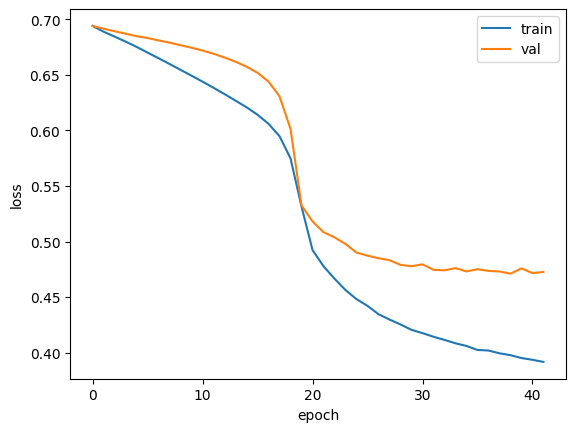

In [ ]:
#손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#09-3. LSTM과 GRU셀 (고급순환층)

기존의 기본 순환층은 학습이 진행될수록 멀리 떨어져 있는 단어 정보를 인식하는 데 어려움이 있음. 이를 보완한 LSTM, GRU

# LSTM(Long Short-Term Memory) 구조

- 단기기억을 오래하기 위해 고안
- 하나의 셀 안에 가중치 곱을 활성화 함수에 통과시키는 셀이 4개 존재

**셀 상태(c)**

은닉 상태와 달리 다음 층으로 전달되지 않고 셀에서 순환되는 값

**은닉상태 출력**

: (입력과 이전 은닉상태의 가중치 곱을 시그모이드 활성화 함수 통과시킨 값) X (tanh 활성화 함수를 통과한 셀 상태)


*tanh 활성화 함수 통과하기 전 셀 상태 계산

:(입력과 이전 은닉상태의 가중치 곱을 시그모이드 통과시킨 값) X (이전 셀 상태)

- 기본 순환층과 달리 가중치 곱에 시그모이드 활성화 함수 사용
- 위에서 사용되는 가중치들은 모두 다름

**다음 셀 상태 계산**

(입력과 이전 은닉상태를 각기 다른 가중치에 곱하여 하나는 시그모이드, 하나는 tanh 함수 통과시킨 결과들의 곱) + (이전 셀 상태)

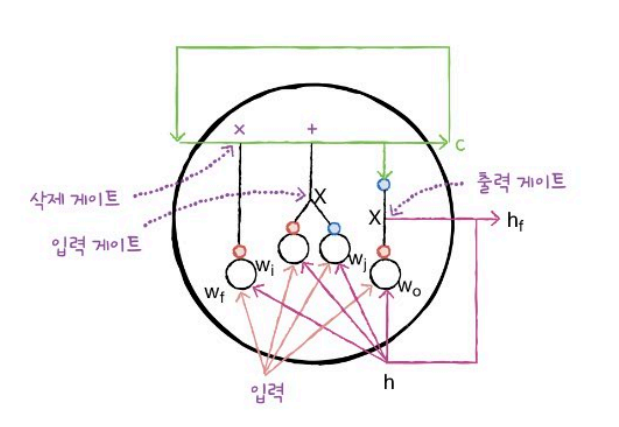

In [ ]:
#LSTM 훈련
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


800 : 셀 안에 작은 셀이 4개 있으므로 simple RNN의 4배

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate =1e-4)
#컴파일
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 61ms/step - loss: 0.6929 - accuracy: 0.5188 - val_loss: 0.6921 - val_accuracy: 0.5668
Epoch 2/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6910 - accuracy: 0.5871 - val_loss: 0.6895 - val_accuracy: 0.6180
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6860 - accuracy: 0.6400 - val_loss: 0.6803 - val_accuracy: 0.6622
Epoch 4/100
313/313 [==============================] - 22s 72ms/step - loss: 0.6558 - accuracy: 0.6804 - val_loss: 0.6208 - val_accuracy: 0.6962
Epoch 5/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6019 - accuracy: 0.7030 - val_loss: 0.5891 - val_accuracy: 0.7104
Epoch 6/100
313/313 [==============================] - 17s 53ms/step - loss: 0.5749 - accuracy: 0.7246 - val_loss: 0.5678 - val_accuracy: 0.7296
Epoch 7/100
313/313 [==============================] - 16s 53ms/step - loss: 0.5542 - accuracy: 0.7408 - val_loss: 0.5481 - val_ac

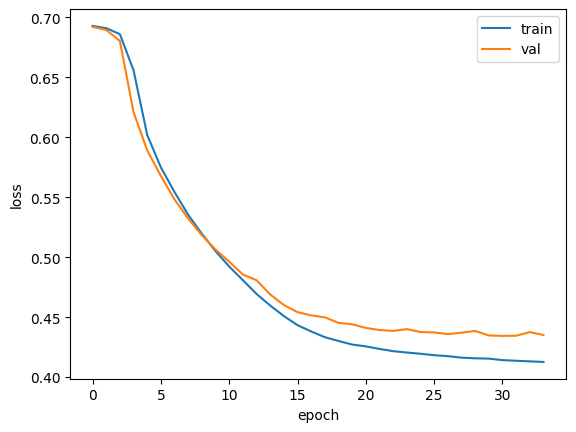

In [ ]:
#손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

기본 RNN 보다 과대적합 억제

In [ ]:
#순환층의 입력에 드롭아웃 적용
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate =1e-4)
#컴파일
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_dropout-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 60ms/step - loss: 0.6925 - accuracy: 0.5300 - val_loss: 0.6919 - val_accuracy: 0.5622
Epoch 2/100
313/313 [==============================] - 17s 56ms/step - loss: 0.6913 - accuracy: 0.5675 - val_loss: 0.6904 - val_accuracy: 0.5886
Epoch 3/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6890 - accuracy: 0.6023 - val_loss: 0.6871 - val_accuracy: 0.6178
Epoch 4/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6837 - accuracy: 0.6272 - val_loss: 0.6790 - val_accuracy: 0.6496
Epoch 5/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6678 - accuracy: 0.6606 - val_loss: 0.6485 - val_accuracy: 0.6932
Epoch 6/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6172 - accuracy: 0.7088 - val_loss: 0.5941 - val_accuracy: 0.7112
Epoch 7/100
313/313 [==============================] - 25s 79ms/step - loss: 0.5829 - accuracy: 0.7220 - val_loss: 0.5728 - val_ac

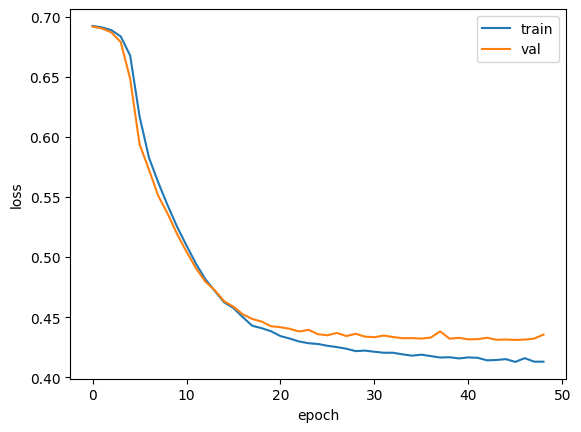

In [ ]:
#손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃 적용 결과, 훈련 손실과 검증 손실 사이 차이 줄어듬

In [ ]:
#2개의 층 연결
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True)) #모든 타임스텝의 은닉 상태 출력
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 100, 8)            800       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


첫 번째 LSTM 층이 모든 타임스탭(100개)의 은닉상태를 출력하므로 (100, 8)

544 = (8(완전연결) X 8 + 8 X 8 + 8) X 4

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate =1e-4)
#컴파일
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_2rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 38s 106ms/step - loss: 0.6930 - accuracy: 0.5173 - val_loss: 0.6927 - val_accuracy: 0.5580
Epoch 2/100
313/313 [==============================] - 34s 107ms/step - loss: 0.6925 - accuracy: 0.5538 - val_loss: 0.6921 - val_accuracy: 0.5736
Epoch 3/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6913 - accuracy: 0.5808 - val_loss: 0.6900 - val_accuracy: 0.6154
Epoch 4/100
313/313 [==============================] - 33s 104ms/step - loss: 0.6878 - accuracy: 0.6128 - val_loss: 0.6836 - val_accuracy: 0.6302
Epoch 5/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6748 - accuracy: 0.6360 - val_loss: 0.6580 - val_accuracy: 0.6724
Epoch 6/100
313/313 [==============================] - 35s 112ms/step - loss: 0.6212 - accuracy: 0.6842 - val_loss: 0.5758 - val_accuracy: 0.7134
Epoch 7/100
313/313 [==============================] - 41s 132ms/step - loss: 0.5601 - accuracy: 0.7235 - val_loss: 0.5407 -

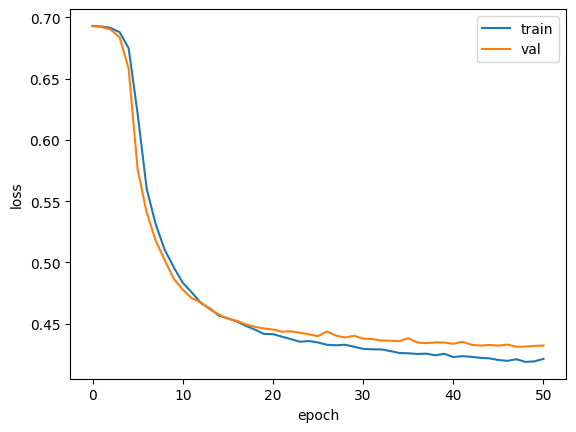

In [ ]:
#손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

일반적으로 순환츨 쌓으면 성능 높아지나 이 예시에선 잘 드러나지 않음

#GRU(Gated Recurrent Unit) 구조

- LSTM의 간소화 버전(계산량 감소)

- Wz : 삭제 게이트 역할
- Wz 가중치 갖는 셀의 출력을 1에서 뺀 값을 Wg 셀의 출력에 곱 -> 입력되는 정보 제어
- Wr 셀의 출력은 Wg 셀이 사용할 은닉 상태의 정보 제어

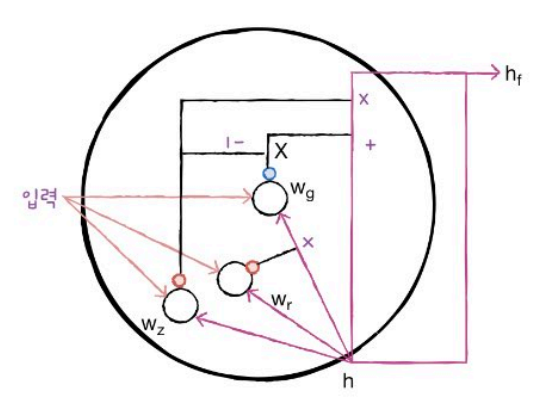


In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate =1e-4)
#컴파일
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 53ms/step - loss: 0.6929 - accuracy: 0.5073 - val_loss: 0.6925 - val_accuracy: 0.5484
Epoch 2/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6921 - accuracy: 0.5478 - val_loss: 0.6918 - val_accuracy: 0.5414
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6910 - accuracy: 0.5523 - val_loss: 0.6906 - val_accuracy: 0.5500
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6893 - accuracy: 0.5659 - val_loss: 0.6887 - val_accuracy: 0.5768
Epoch 5/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6870 - accuracy: 0.5846 - val_loss: 0.6862 - val_accuracy: 0.5778
Epoch 6/100
313/313 [==============================] - 16s 53ms/step - loss: 0.6838 - accuracy: 0.5918 - val_loss: 0.6828 - val_accuracy: 0.5828
Epoch 7/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6794 - accuracy: 0.5962 - val_loss: 0.6782 - val_ac

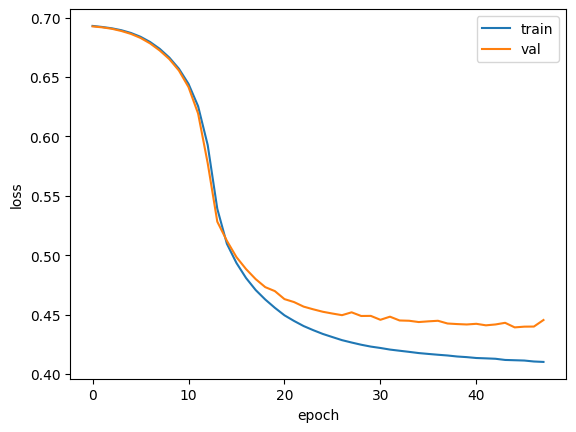

In [ ]:
#손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()